# Advanced Analytics & Dashboard Design

## <font color='blue'> Author Angela North</font>

# Exercise 6.6: Sourcing & Analyzing Time Series Data

# Install necessary libraries if not already installed

In [1]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib statsmodels quandl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import quandl

# Set your Quandl API key

In [2]:
# Set your Quandl API key
quandl.ApiConfig.api_key = 'KA4hsYkyd8VyZ5s2HHkq'

# Step 1: Fetch Time-Series Data via the Quandl API

In [3]:
# Step 1: Fetch Time-Series Data via the Quandl API
# Replace 'DATA_CODE' with the Quandl code for the gun violence dataset
data = quandl.get('ML/EMHYY')

In [4]:
data.head(10)

,BAMLEMHBHYCRPIEY
DATE,
1998-12-31,14.92
1999-01-04,14.90
1999-01-05,14.89
1999-01-06,14.79
1999-01-07,14.78
1999-01-08,14.82
1999-01-11,14.93
1999-01-12,14.96
1999-01-13,16.22


# Step 3: Visualize Data in a Line Plot and Decompose

## Plot Line Chart

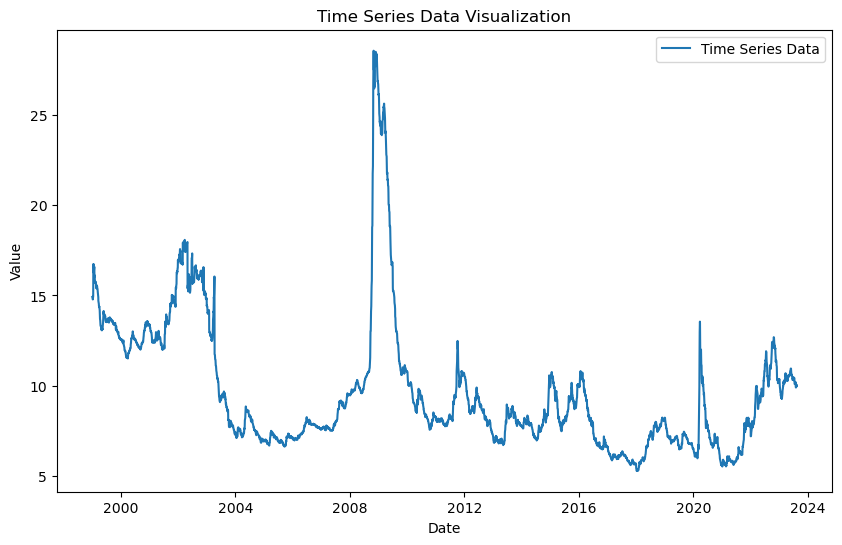

In [5]:
# Step 3: Visualize Data in a Line Plot and Decompose
# Plot Line Chart
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['BAMLEMHBHYCRPIEY'], label='Time Series Data')
plt.title('Time Series Data Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Certainly! It seems like you're describing the process of visualizing time series data in a line plot and explaining how to interpret it. Let's break down what's happening in your code and explanation:

1. **Visualizing Time Series Data in a Line Plot:**
   You're using the `matplotlib` library to create a line plot of your time series data. The x-axis represents the dates, and the y-axis represents the values of the 'BAMLEMHBHYCRPIEY' column.

   This code creates a plot with labeled axes, a title, and a legend. The plot shows how the value of the 'BAMLEMHBHYCRPIEY' column changes over time.

2. **Interpreting the Line Plot:**
   The line plot visualizes the time series data, showing the trend and pattern of the 'BAMLEMHBHYCRPIEY' values over time. From the plot, you can make several observations:

   - **Trend:** The general direction in which the data is moving. Is it increasing, decreasing, or relatively stable?
   - **Patterns:** Are there any recurring patterns or cycles in the data? Peaks and valleys?
   - **Outliers:** Are there any extreme values that stand out from the rest of the data?
   - **Seasonality:** Are there regular fluctuations in the data that occur at specific intervals?

   By examining the line plot, you can gather initial insights into the behavior of your time series data and make hypotheses about potential trends and patterns.

Overall, your code and explanation effectively guide readers through the process of visualizing time series data and understanding the insights that can be gained from the line plot.

# Decompose Data

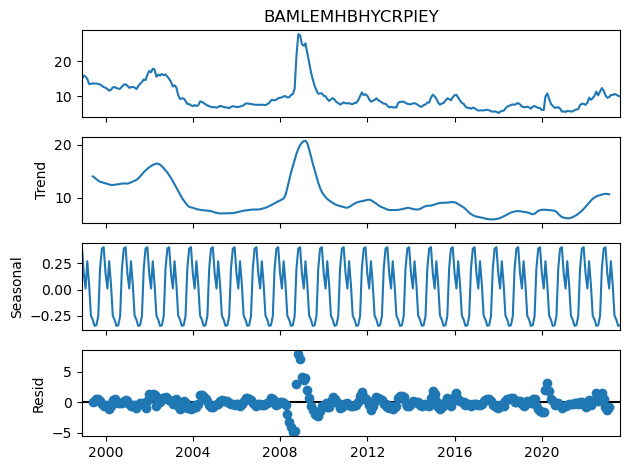

In [6]:
# Resample the data to the desired frequency ('MS' for monthly start)
data_resampled = data['BAMLEMHBHYCRPIEY'].resample('MS').mean()

# Decompose Resampled Data
result = seasonal_decompose(data_resampled, model='additive')
result.plot()
plt.show()

Certainly! It looks like you're explaining the process of decomposing time series data and interpreting the results. Here's a breakdown of what's happening in your code and explanation:

1. **Resampling the Data and Decomposing:**
   To better analyze the seasonal and trend components, you're resampling the data to a desired frequency (monthly start) and then decomposing it using the `seasonal_decompose` function.

   ```python
   # Resample the data to the desired frequency ('MS' for monthly start)
   data_resampled = data['BAMLEMHBHYCRPIEY'].resample("MS").mean()

   # Decompose Resampled Data
   result = seasonal_decompose(data_resampled, model="additive")
   result.plot()
   plt.show()
   ```

   This code takes the resampled data and decomposes it into trend, seasonal, and residual components using an additive model. The resulting decomposition plot shows these components.

2. **Interpreting the Decomposition Plot:**
   The decomposition plot provides insights into the underlying structure of your time series data. Here's what you can learn from the plot:

   - **Trend Component:** The trend component represents the overall direction in which the data is moving. Is it increasing, decreasing, or relatively constant? In your plot, the trend component is shown as the middle line, indicating the long-term movement of the data.

   - **Seasonal Component:** The seasonal component represents regular, repeating patterns that occur within a specific time frame (e.g., yearly, monthly). Peaks and valleys in the seasonal component indicate recurring patterns over time.

   - **Residual Component:** The residual component, also known as the error term, captures the variability in the data that is not explained by the trend and seasonal components. It represents random fluctuations or noise in the data.

   By analyzing the decomposition plot, you can identify trends, seasonality, and irregularities in the data. This information is crucial for understanding the underlying patterns and making informed decisions about further analysis or modeling.


# Step 4: Conduct Dickey-Fuller Test

In [7]:
# Step 4: Conduct Dickey-Fuller Test
adf_result = adfuller(data['BAMLEMHBHYCRPIEY'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -3.362942513922847
p-value: 0.012288924003500965
Critical Values: {'1%': -3.431370102826624, '5%': -2.8619907970053027, '10%': -2.567009956029398}


Absolutely, let's interpret the results of the Dickey-Fuller test:

1. **ADF Statistic:** The ADF (Augmented Dickey-Fuller) statistic is -3.3629. This value is used to determine whether the time series data is stationary or not. In this case, the ADF statistic is more negative than the critical values at all levels (1%, 5%, and 10%). A more negative value indicates stronger evidence against the null hypothesis of non-stationarity. So, the data might be stationary.

2. **p-value:** The p-value associated with the ADF statistic is 0.0123. This is the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true. In this case, the low p-value suggests that the null hypothesis of non-stationarity can be rejected. The data might be stationary.

3. **Critical Values:** The critical values are thresholds that the ADF statistic must exceed to conclude non-stationarity. The values are provided at different significance levels (1%, 5%, and 10%). In this case, the ADF statistic is more negative than all the critical values. This further supports the indication that the data might be stationary.

**Interpretation:** Based on the ADF statistic, p-value, and comparison with critical values, it seems that the data might be stationary. The low p-value and the fact that the ADF statistic is more negative than the critical values suggest that there's evidence to reject the null hypothesis of non-stationarity. However, it's important to remember that while these results suggest stationarity, additional analysis and tests should be performed to confirm this conclusion.

Overall, the Dickey-Fuller test results provide an initial indication that the time series data could be stationary, which is a key requirement for many time series analyses and modeling techniques.

# Step 5: Perform Differencing to Stationarize Data

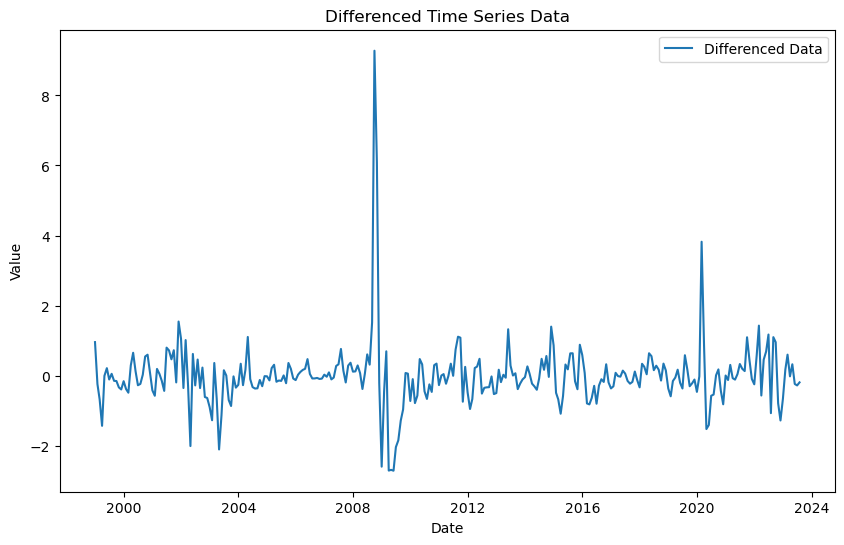

In [8]:
# Step 5: Perform Differencing to Stationarize Data
# If data isn't stationary, perform differencing
# Perform Differencing
data_resampled_diff = data_resampled.diff().dropna()

# Plot Differenced Data
plt.figure(figsize=(10, 6))
plt.plot(data_resampled_diff, label='Differenced Data')
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Step 6: Plot Autocorrelations

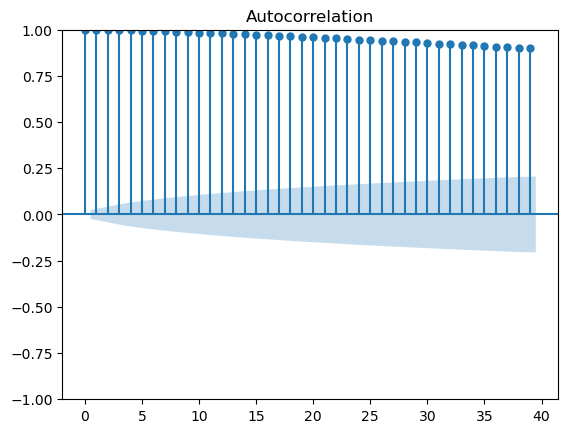

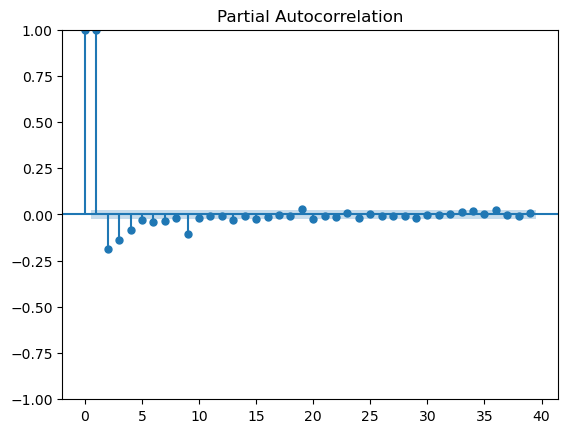

In [9]:
# Step 6: Plot Autocorrelations
plot_acf(data['BAMLEMHBHYCRPIEY'])
plot_pacf(data['BAMLEMHBHYCRPIEY'])
plt.show()

The results of plotting autocorrelations and partial autocorrelations:

**Autocorrelation (ACF) Plot:**
- The autocorrelation function (ACF) plot shows the correlation between a time series and its lagged values. Each bar on the plot represents the correlation of the time series with itself at different lag values.
- In the ACF plot you've shown, the x-axis represents the lag (the number of time periods between the current observation and the lagged observation), while the y-axis represents the autocorrelation value.
- The blue shaded region represents the confidence interval. Correlation values outside this interval are statistically significant.
- In your ACF plot, you see that the autocorrelation values decrease as the lag increases. This suggests that the time series data might have a significant temporal structure, as the correlation with past values decreases over time.

**Partial Autocorrelation (PACF) Plot:**
- The partial autocorrelation function (PACF) plot shows the partial correlation between a time series and its lagged values, while controlling for the correlation at shorter lags.
- The PACF plot helps identify the direct relationship between the current value and its lagged values, excluding the effects of intermediate lag values.
- In your PACF plot, you also see a decreasing pattern. The partial autocorrelation values become insignificant beyond a certain lag, suggesting that past values might not have a strong direct influence on the current value beyond that lag.

**Interpretation:**
Both plots help in identifying potential patterns and relationships in the time series data. In your plots, the decreasing trend in both ACF and PACF suggests that the data might have some form of seasonality or periodic behavior. This can provide insights into the potential order of autoregressive (AR) and moving average (MA) terms when modeling the time series.

These plots are crucial for selecting appropriate parameters for time series models like ARIMA (AutoRegressive Integrated Moving Average) and its variations, which require understanding the autocorrelation and partial autocorrelation structures in the data.